# To get access to the dataset:
- If you already have the folder with the datasets, you might need to 'git pull' to ensure that it is updated
> Else, clone repo using the command below <br>
> "git clone https://github.com/clemnyan/ENGS_108_Fall_2021.git" <br>


## **Problem 2: Introduction to TensorFlow**
In this problem, we will start working in tensorflow to build deep learning systems starting with fully connected neural networks. We will focus on using the food image dataset we built in the last problem.
>
> **(a)** Using the food image dataset we built in the last problem (last week's assignment!), build a [tensorflow Data Dataset](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) that is shuffled with a batch size of 10. 

Found 978 files belonging to 9 classes.
num total points: 978
num train points: 832
num validation points: 114
num test points: 32


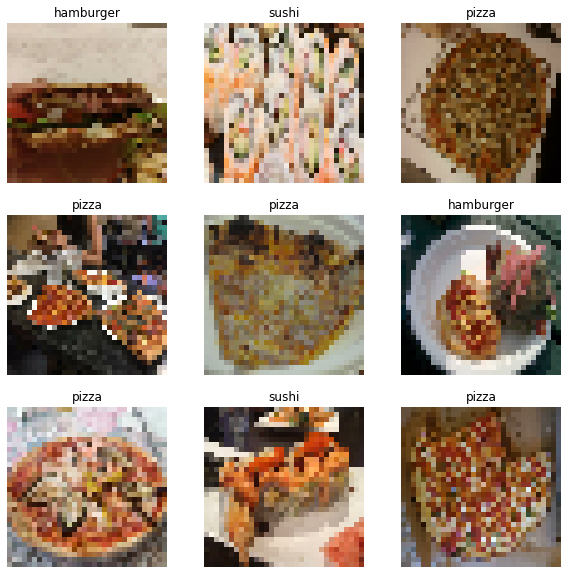

In [96]:
#Code and explanation for 2a
from PIL import Image
import tqdm
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

#tf.disable_v2_behavior() 

working_dir = "datasets/"

folder = os.path.join(working_dir, 'ExampleFoodImageDataset')

batch_size=32
DATASET_SIZE = 978
img_height = 32
img_width = 32
num_classes = 9

all_data = tf.keras.utils.image_dataset_from_directory(
  str(folder),
  seed=123,
  image_size=(img_height, img_width),
  batch_size = batch_size,
  label_mode="categorical"
    
)

class_names = all_data.class_names

# Now we shuffle the dataset, and show the results for the first 9 elements
# without the line below, the  code will return different set of the first 9 images
#all_data = all_data.shuffle(10)


################ utility functions

def get_count(dataset1): 
    count=0
    for images, _ in dataset1:
      for i in images:
        count = count+1
    return count

def get_features_labels(dataset):
    train_elems = []
    train_labels = []
    for elem, label in train_dataset:
        for e in elem:
            train_elems.append(e.numpy())
        for l in label:
            train_labels.append(l.numpy())
    return np.array(train_elems),np.array(train_labels)
#############


# plot assortment of positive and negative labels
plt.figure(figsize=(10, 10))
#get first batch of data
for images, labels in all_data.take(1):
  #get first 9 entries in batch
  for i in range(9):
    label = int(np.where(labels[i]>0)[0])
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[label])
    plt.axis("off")


# out of a total of 31 batches, take first 27 for training, 3 for validation, and 1 for test
train_size = 26
val_size = 4
test_size = 1

train_dataset = all_data.take(train_size)
test_dataset = all_data.skip(train_size)
val_dataset = test_dataset.skip(test_size)
test_dataset = test_dataset.take(test_size)

print("num total points: " + str(get_count(all_data)))
print("num train points: " + str(get_count(train_dataset)))
print("num validation points: " + str(get_count(val_dataset)))
print("num test points: " + str(get_count(test_dataset)))

> **(b)** Build a two layer fully connected neural network of any size with a ReLu activation function and a final softmax layer.

In [98]:
from tensorflow.keras import layers, models

model = tf.keras.Sequential([
  # data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Dense(128, activation='relu'),
  layers.Dense(64, activation='relu'),
  layers.Flatten(),
  layers.Dense(9, activation = 'softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

train_features,train_labels = get_features_labels(train_dataset)

model.fit(train_dataset,validation_data=val_dataset, epochs=10)

model.summary()

# Test the model after training
#test_results = model.evaluate(X_test, Y_test, verbose=1)

Epoch 1/10
26/26 [==============================] - 3s 91ms/step - loss: 1.9446 - accuracy: 0.2716 - val_loss: 1.6056 - val_accuracy: 0.3509
Epoch 2/10
26/26 [==============================] - 2s 83ms/step - loss: 1.5735 - accuracy: 0.4002 - val_loss: 1.4801 - val_accuracy: 0.4737
Epoch 3/10
26/26 [==============================] - 2s 83ms/step - loss: 1.4031 - accuracy: 0.4712 - val_loss: 1.3557 - val_accuracy: 0.5439
Epoch 4/10
26/26 [==============================] - 2s 83ms/step - loss: 1.2140 - accuracy: 0.5565 - val_loss: 1.1470 - val_accuracy: 0.6491
Epoch 5/10
26/26 [==============================] - 2s 83ms/step - loss: 1.0418 - accuracy: 0.6502 - val_loss: 0.9488 - val_accuracy: 0.6842
Epoch 6/10
26/26 [==============================] - 2s 87ms/step - loss: 0.8747 - accuracy: 0.7212 - val_loss: 0.9273 - val_accuracy: 0.6754
Epoch 7/10
26/26 [==============================] - 2s 86ms/step - loss: 0.7208 - accuracy: 0.7620 - val_loss: 0.6222 - val_accuracy: 0.8070
Epoch 8/10
26

In [26]:
# Code and explanation
# This code is following along with the tutorial described here: 
# https://towardsdatascience.com/multi-layer-perceptron-using-tensorflow-9f3e218a4809
num_classes = 9
num_features = data.shape[1]
print("num features: " + str(num_features))
num_output = 9
num_layers_0 = 512
num_layers_1 = 256
starter_learning_rate = 0.001
regularizer_rate = 0.1
# print(tf.__version__)
# tf.compat.v1.enable_v2_behavior()
# dataset = tf.data.Dataset.as_numpy(dataset)

# Placeholders for the input data
input_X = tf.placeholder('float32',shape =(None,num_features),name="input_X")
input_y = tf.placeholder('float32',shape = (None,num_classes),name='input_Y')
## for dropout layer
keep_prob = tf.placeholder(tf.float32)

## Weights initialized by random normal function with std_dev = 1/sqrt(number of input features)
weights_0 = tf.Variable(tf.random_normal([num_features,num_layers_0], stddev=(1/tf.sqrt(float(num_features)))))
bias_0 = tf.Variable(tf.random_normal([num_layers_0]))
weights_1 = tf.Variable(tf.random_normal([num_layers_0,num_layers_1], stddev=(1/tf.sqrt(float(num_layers_0)))))
bias_1 = tf.Variable(tf.random_normal([num_layers_1]))
weights_2 = tf.Variable(tf.random_normal([num_layers_1,num_output], stddev=(1/tf.sqrt(float(num_layers_1)))))
bias_2 = tf.Variable(tf.random_normal([num_output]))

## Initializing weigths and biases
hidden_output_0 = tf.nn.relu(tf.matmul(input_X,weights_0)+bias_0)
hidden_output_0_0 = tf.nn.dropout(hidden_output_0, rate = 1- keep_prob)
hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0_0,weights_1)+bias_1)
hidden_output_1_1 = tf.nn.dropout(hidden_output_1, rate = 1-keep_prob)
predicted_y = tf.sigmoid(tf.matmul(hidden_output_1_1,weights_2) + bias_2)

num features: 2352


The above code first defines placeholders for the input variable, which will be 2352=28*28*3 dimensional, and start off with 0 rows. The output variable will be 9-dimensional, with one output for each class in the dataset. The biases and weights are then initialized with random normal samples, with mean 0. For the weights, the standard deviation is weighted with the inverse of the square root of the number of features, which the bias starts off as a standard normal with variance 1. Finally, each output layer is defined in terms of its previous layer, and an activation function (with the initialized weights an biases defined in the previous step). 


> **(c)** Compile your model with an appropriate loss function and optimizer. Briefly describe your choices.

The loss being used is the cross-entropy loss, which is the recommended loss for categorical variables with a one-hot encoding, according to the keras documentation. plus a regularization term that penalizes large bias terms. 

> **(d)** Train your model on the food image training dataset. And report your accuracy on the testing dataset.

In [ ]:
# Code and explanation
s = tf.InteractiveSession()

## Variable learning rate
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.85, staircase=True)
## Adam optimzer for finding the right weight
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2,

## Metrics definition
correct_prediction = tf.equal(tf.argmax(y_train,1), tf.argmax(predicted_y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
                                                                          
## Training parameters
batch_size = 128
epochs=14
dropout_prob = 0.6
training_accuracy = []
training_loss = []
testing_accuracy = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run(optimizer, {input_X: X_train[arr[index:index+batch_size]],
                          input_y: y_train[arr[index:index+batch_size]],
                        keep_prob:dropout_prob})
    training_accuracy.append(s.run(accuracy, feed_dict= {input_X:X_train, 
                                                         input_y: y_train,keep_prob:1}))
    training_loss.append(s.run(loss, {input_X: X_train, 
                                      input_y: y_train,keep_prob:1}))
    
    ## Evaluation of model
    testing_accuracy.append(accuracy_score(y_test.argmax(1), 
                            s.run(predicted_y, {input_X: X_test,keep_prob:1}).argmax(1)))
    print("Epoch:{0}, Train loss: {1:.2f} Train acc: {2:.3f}, Test acc:{3:.3f}".format(epoch,
                                                                    training_loss[epoch],
                                                                    training_accuracy[epoch],
                                                                   testing_accuracy[epoch]))

> **(e)** Now try to tune this network by varying the number of layers, units, activations and see if you can outperform the network in part (d). Does your best model perform better or worse than the SVM in problem 1?

In [ ]:
# Code and explanation

> **(BONUS)** We lost a lot of information when we resized the images in part (a). What would happen if we didn't resize the images and we built fit the neural network with all this other information? Try it out! *Hint: Runtime will be much longer, both to create the image dataset without resizing and to train the model, so you might have to get the code working and then just let it run.*

In [7]:
# Code and explanation

> **(BONUS)** Implement and explain other feature engineering (and data augmentation) techniques that we can perform to increase prediction accuracy? 

In [8]:
# Code and explanation



# data_augmentation = tf.keras.Sequential(
#   [
#     layers.RandomFlip("horizontal",
#                       input_shape=(img_height,
#                                   img_width,
#                                   3)),
#     layers.RandomRotation(0.1),
#     layers.RandomZoom(0.1),
#   ]
# )
# shuffle with buffer size 10
